# Raster Data for Earth Data Science

## Elevation Data

We'll use a lidar DTM dataset produced before a flood occurred in 2013 in Colorado.
lidar stands for Light Detection and Ranging.
DTM stands for Digital Terrain Models.
DTMs are topographic model of the bare Earth that can be manipulated by computer programs. It contains the elevation data of the terrain in a digital format which relates to a rectangular grid. Vegetation, buildings and other cultural features are removed digitally leaving the underlying terrain. Source[EEA Glossary](https://www.eea.europa.eu/help/glossary/eea-glossary/digital-terrain-model#:~:text=in%20your%20browser.-,Term,relates%20to%20a%20rectangular%20grid.)

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep


In [7]:
# Get data and set the working direcctory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Extracted output to C:\Users\PC\earth-analytics\data\colorado-flood\.


In [9]:
# Create a path to file
# pre_DTM.tif is the data which is lidar derived elevation data and in .tif format
lidar_dtm_path = os.path.join("colorado-flood",
                             "spatial",
                             "boulder-leehill-rd",
                             "pre-flood",
                             "lidar",
                             "pre_DTM.tif")
lidar_dtm_path

'colorado-flood\\spatial\\boulder-leehill-rd\\pre-flood\\lidar\\pre_DTM.tif'

In [11]:
# reading the data in the digital terrain model using rioxarray
# and using masked=True statement to mask all nodata values in the array.
lidar_dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)

#viewing the data
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

## Exploring Raster Data Values & Structure

In [13]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

calling `type()` on the Rioxarray variable's name returns an xarray DataArray. This contains metadata about the array as well as the data for the array stored in a numpy array.
To view the numpy array stored inside an xarray DataArray, add `.values` to the end of your Rioxarray variable name. 

In [15]:
lidar_dtm.dtype

dtype('float32')

In [16]:
# View the min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())

<xarray.DataArray ()>
array(1676.20996094)
Coordinates:
    spatial_ref  int32 0 <xarray.DataArray ()>
array(2087.42993164)
Coordinates:
    spatial_ref  int32 0


In [17]:
# viewing the dimensions of the array (rows, columns)
lidar_dtm.shape

(1, 2000, 4000)

## Visualizing the data

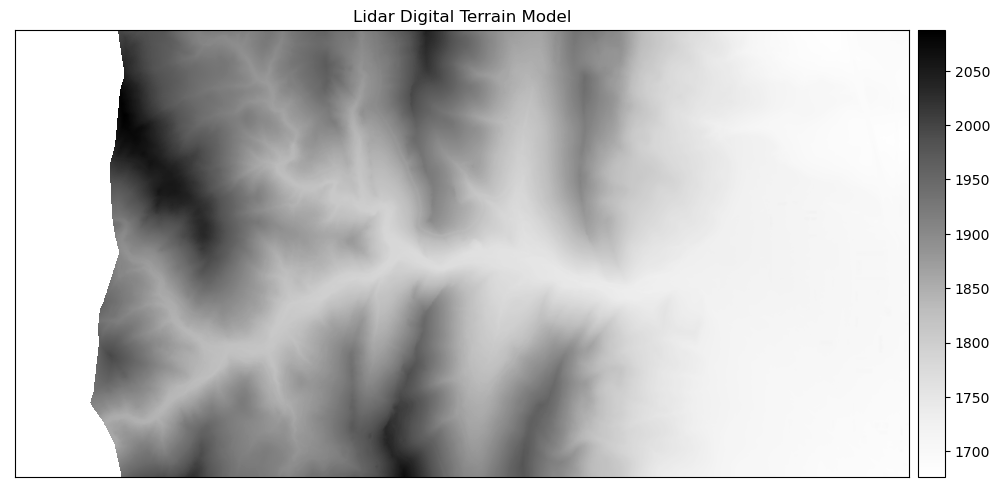

In [21]:
# for plotting we'll use 'earthpy.plot_bands'
ep.plot_bands(lidar_dtm,
             scale=False,
             cmap='Greys',
             title="Lidar Digital Terrain Model")
plt.show()

## Challenges

Challenge 1 Solution:
* The colors and numbers in the plot provides the bare earth representation of the terrain. It shows the elevation of the underlying terrain (no vegetation, buildings and other cultural features).

Challenge 2 solution:

In [24]:
# creating a path for post-flood data
lidar_dem_path_post_flood = os.path.join("colorado-flood",
                                        "spatial",
                                        "boulder-leehill-rd",
                                        "post-flood",
                                        "lidar",
                                        "post_DTM.tif")

In [25]:
# reading the data in the digital terrain model using rioxarray
# and using masked=True statement to mask all nodata values in the array.
lidar_dtm_post = rxr.open_rasterio(lidar_dem_path_post_flood, masked=True)

#viewing the data
lidar_dtm_post

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [26]:
# exploring the dataset
type(lidar_dtm_post)

xarray.core.dataarray.DataArray

In [30]:
#printing the min and max data values
print(lidar_dtm_post.min())

print(lidar_dtm_post.max())

<xarray.DataArray ()>
array(1675.70996094)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(2111.95996094)
Coordinates:
    spatial_ref  int32 0


In [32]:
lidar_dtm_post.shape

(1, 2000, 4000)

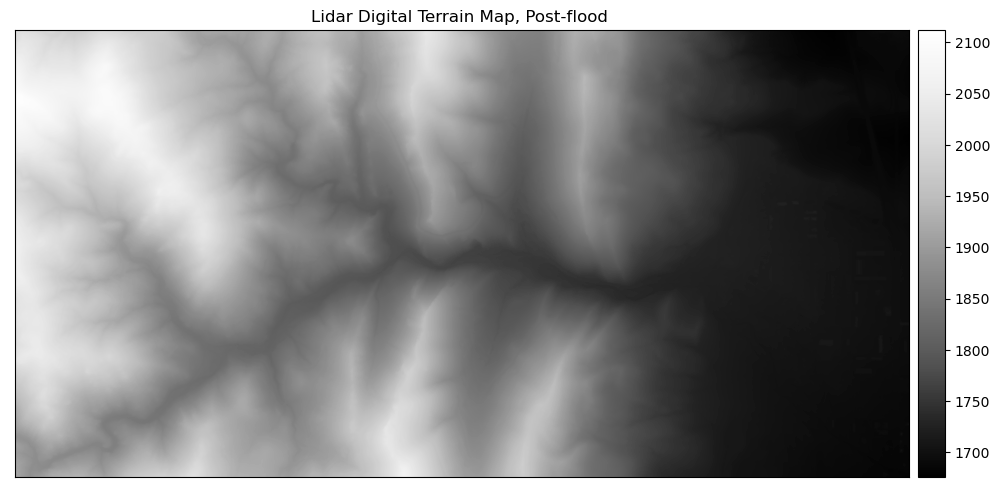

<AxesSubplot:title={'center':'Lidar Digital Terrain Map, Post-flood '}>

In [49]:

# Plotting red, gree and blue bands, respectively
ep.plot_bands(lidar_dtm_post.values,
            title="Lidar Digital Terrain Map, Post-flood ")

## Satellite imaginery 

Here, we'll download and open up some NAIP data collected before a fire that occured close to Nederland, Colorado.

In [63]:
# Download NAIP data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

Extracted output to C:\Users\PC\earth-analytics\data\earthpy-downloads\naip-before-after


'C:\\Users\\PC\\earth-analytics\\data\\earthpy-downloads\\naip-before-after'

In [65]:
# creating a path for the data file 
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                 "naip-before-after",
                                 "pre-fire",
                                 "crop",
                                 "m_3910505_nw_13_1_20150919_crop.tif")
naip_pre_fire_path

'earthpy-downloads\\naip-before-after\\pre-fire\\crop\\m_3910505_nw_13_1_20150919_crop.tif'

In [66]:
#next, we open the data using rioxarray
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)

naip_pre_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768.0
    scale_factor:        1.0
    add_offset:          0.0

Imagery is composed of multiple bands so plotting is different from plotting Elevation data with single band.
plotting imagery can be done in 2ways: plotting individual bands or plotting a color image (similar to the image from a camera)

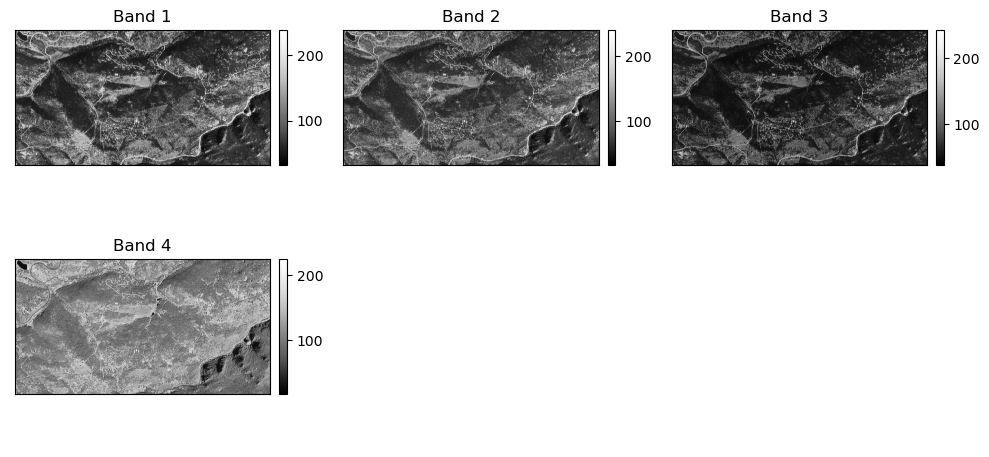

In [70]:
# plotting each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10,5))
plt.show()

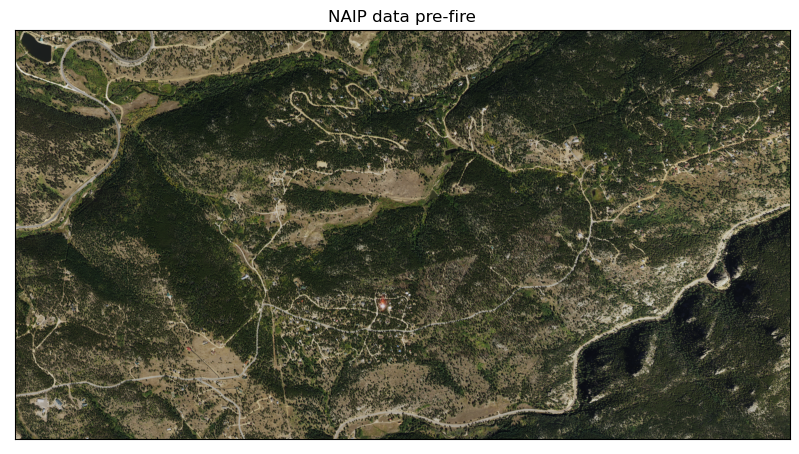

In [71]:
# plotting a color image
ep.plot_rgb(naip_pre_fire.values, title="NAIP data pre-fire")
plt.show()

Plotting NAIP Imagery Post Fire

In [72]:
# Create a path for the data file - notice it is a .tif file
naip_post_fire_path = os.path.join("earthpy-downloads",
                                   "naip-before-after",
                                   "post-fire",
                                   "crop",
                                   "m_3910505_nw_13_1_20170902_crop.tif")

naip_post_fire_path

'earthpy-downloads\\naip-before-after\\post-fire\\crop\\m_3910505_nw_13_1_20170902_crop.tif'

In [73]:
#next, we open the data using rioxarray
naip_post_fire = rxr.open_rasterio(naip_post_fire_path)

naip_post_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  234
    STATISTICS_MEAN:     63.874147003881
    STATISTICS_MINIMUM:  6
    STATISTICS_STDDEV:   47.250919834769
    _FillValue:          -32768.0
    scale_factor:        1.0
    add_offset:          0.0

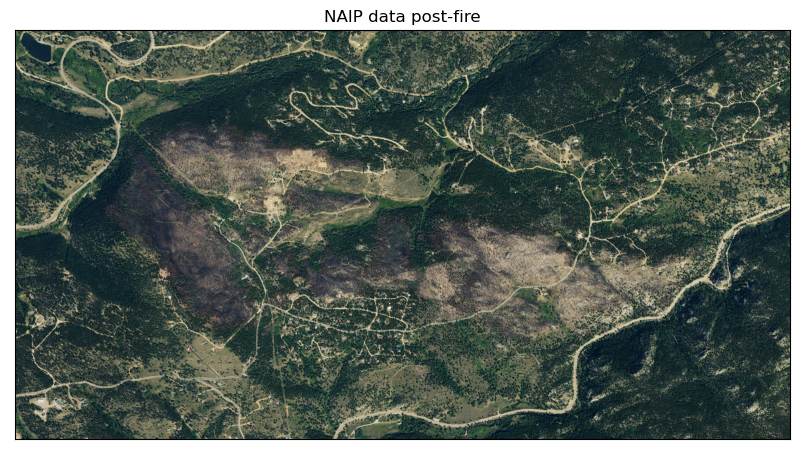

In [75]:
# plotting a color image of the post fire data
ep.plot_rgb(naip_post_fire.values, title="NAIP data post-fire")
plt.show()